In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import pandas as pd
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt



In [3]:
corpus = open('sample_corpus.txt', 'r', encoding='utf8').read()

In [4]:
print(corpus)

Я всегда любил зиму. 
Помнится, наигравшись вдоволь во дворе, я прибегал домой и отогревался у камина.
Пока за окном бушевала вьюга, я сидел в широком отцовском кресле, вытянув ноги к огню.
В руках глиняная кружка, из которой я медленно, наслаждаясь каждым глотком, цедил мамин медовый отвар.
Любуясь красно-рыжими язычками пламени, мерно подрагивавшими в очаге и дарившими покой и защиту.
Но, увы, все это было в другой жизни.
За последние несколько дней мое отношение к зиме кардинально изменилось.
Собачий холод, глубокие сугробы, пробирающий до мозга кости ветер – я ненавидел зиму.
Ближе к полудню мы спустились в долину и уже по мелколесью продолжили путь на запад.
Каждые два-три часа мне приходилось объявлять привал.
Сугробы выше колена и сильный ветер довольно быстро опустошали мой источник энергии.
На первом привале хотел было глотнуть зелья насыщения, но, понаблюдав за работой «регенерации», пришел к выводу, что тело само прекрасно справляется.
Пока я, словно старая черепаха, медленн

In [5]:
corpus = re.sub(r'[\d\t,.?!-]','',corpus).split('\n')
print(corpus[:10])

['Я всегда любил зиму ', 'Помнится наигравшись вдоволь во дворе я прибегал домой и отогревался у камина', 'Пока за окном бушевала вьюга я сидел в широком отцовском кресле вытянув ноги к огню', 'В руках глиняная кружка из которой я медленно наслаждаясь каждым глотком цедил мамин медовый отвар', 'Любуясь краснорыжими язычками пламени мерно подрагивавшими в очаге и дарившими покой и защиту', 'Но увы все это было в другой жизни', 'За последние несколько дней мое отношение к зиме кардинально изменилось', 'Собачий холод глубокие сугробы пробирающий до мозга кости ветер – я ненавидел зиму', 'Ближе к полудню мы спустились в долину и уже по мелколесью продолжили путь на запад', 'Каждые дватри часа мне приходилось объявлять привал']


In [6]:
def tokenize_corpus(corpus):
    tokens = [x.split() for x in corpus]
    return tokens

tokenized_corpus = tokenize_corpus(corpus)
print(tokenized_corpus)

[['Я', 'всегда', 'любил', 'зиму'], ['Помнится', 'наигравшись', 'вдоволь', 'во', 'дворе', 'я', 'прибегал', 'домой', 'и', 'отогревался', 'у', 'камина'], ['Пока', 'за', 'окном', 'бушевала', 'вьюга', 'я', 'сидел', 'в', 'широком', 'отцовском', 'кресле', 'вытянув', 'ноги', 'к', 'огню'], ['В', 'руках', 'глиняная', 'кружка', 'из', 'которой', 'я', 'медленно', 'наслаждаясь', 'каждым', 'глотком', 'цедил', 'мамин', 'медовый', 'отвар'], ['Любуясь', 'краснорыжими', 'язычками', 'пламени', 'мерно', 'подрагивавшими', 'в', 'очаге', 'и', 'дарившими', 'покой', 'и', 'защиту'], ['Но', 'увы', 'все', 'это', 'было', 'в', 'другой', 'жизни'], ['За', 'последние', 'несколько', 'дней', 'мое', 'отношение', 'к', 'зиме', 'кардинально', 'изменилось'], ['Собачий', 'холод', 'глубокие', 'сугробы', 'пробирающий', 'до', 'мозга', 'кости', 'ветер', '–', 'я', 'ненавидел', 'зиму'], ['Ближе', 'к', 'полудню', 'мы', 'спустились', 'в', 'долину', 'и', 'уже', 'по', 'мелколесью', 'продолжили', 'путь', 'на', 'запад'], ['Каждые', 'дватр

In [7]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)

In [8]:
word2idx

{'«выносливость»': 233,
 '«регенерации»': 120,
 '«силу»': 232,
 '«совсем': 182,
 'Баг': 253,
 'Ближе': 81,
 'В': 30,
 'Видя': 147,
 'Все': 212,
 'Его': 181,
 'За': 61,
 'И': 252,
 'Каждые': 93,
 'Коекак': 240,
 'Любуясь': 44,
 'Маленькие': 290,
 'Ми': 136,
 'Мне': 258,
 'Мои': 261,
 'На': 110,
 'Невысокая': 287,
 'Необходимо': 230,
 'Но': 54,
 'Обжора': 142,
 'Пока': 16,
 'Помнится': 4,
 'Правда': 206,
 'Причем': 165,
 'Сегодня': 269,
 'Собачий': 70,
 'Солнце': 172,
 'Сугробы': 100,
 'Это': 276,
 'Этот': 222,
 'Я': 0,
 'близко»': 183,
 'бревенчатая': 279,
 'буду': 272,
 'буквальном': 195,
 'бушевала': 19,
 'бы': 217,
 'была': 277,
 'были': 292,
 'было': 58,
 'быстро': 105,
 'в': 22,
 'вдоволь': 6,
 'верхом': 137,
 'весть': 177,
 'ветер': 78,
 'вид': 289,
 'во': 7,
 'возможность': 239,
 'восстанавливала': 170,
 'впервые': 270,
 'вперед': 135,
 'все': 56,
 'всегда': 1,
 'всетаки': 241,
 'выбранное': 249,
 'выводу': 122,
 'выпадет': 237,
 'выполнял': 139,
 'вытянув': 26,
 'выше': 101,
 'в

In [9]:
window_size = 2
idx_pairs = []
# for each sentence
for sentence in tokenized_corpus:
    indices = [word2idx[word] for word in sentence]
    # for each word, threated as center word
    for center_word_pos in range(len(indices)):
        # for each window position
        for w in range(-window_size, window_size + 1):
            context_word_pos = center_word_pos + w
            # make soure not jump out sentence
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))

idx_pairs = np.array(idx_pairs) # it will be useful to have this as numpy array

In [10]:
idx_pairs[:10]

array([[0, 1],
       [0, 2],
       [1, 0],
       [1, 2],
       [1, 3],
       [2, 0],
       [2, 1],
       [2, 3],
       [3, 1],
       [3, 2]])

In [11]:
def get_input_layer(words_idx):
    x = torch.zeros(words_idx.shape[0], vocabulary_size).float()
    x[list(range(0, words_idx.shape[0])), words_idx] = 1.
    return x

In [12]:
embedding_dims = 5

class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_line = nn.Linear(vocabulary_size, embedding_dims)
        self.output_line = nn.Linear(embedding_dims, vocabulary_size)
        
    def forward(self, X):
        X = F.relu(self.input_line(X))
        return F.softmax(self.output_line(X))


In [13]:
eta = 0.001
epochs = 1010
model = MyModule()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=eta)

In [15]:
losses = []
batch_size = 59
for epoch in range(epochs):
  loss_val = []
  for batch in range(0,idx_pairs.shape[0], batch_size):
    x = get_input_layer(idx_pairs[batch:batch+batch_size, 0])
    target = torch.from_numpy(np.array([idx_pairs[batch:batch+batch_size, 1]]))

    y = model(x)
    loss = loss_function(y, target.view(-1))
    loss_val.append(loss.item())
    loss.backward()
    optimizer.step()

    model.zero_grad()

  losses.append(np.mean(loss_val))
  if epoch % 10 == 0:    
        print(f'Loss at epo {epoch}: {np.mean(loss_val)}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # This is added back by InteractiveShellApp.init_path()


Loss at epo 0: 5.693768566304987
Loss at epo 10: 5.693501125682484
Loss at epo 20: 5.692235664887861
Loss at epo 30: 5.67473257671703
Loss at epo 40: 5.667347539554942
Loss at epo 50: 5.66451265595176
Loss at epo 60: 5.661795789545232
Loss at epo 70: 5.658240296623924
Loss at epo 80: 5.653514970432628
Loss at epo 90: 5.648187724026767
Loss at epo 100: 5.6427177515896885
Loss at epo 110: 5.63644383170388
Loss at epo 120: 5.62797591902993
Loss at epo 130: 5.617958740754561
Loss at epo 140: 5.608377651734785
Loss at epo 150: 5.5994275916706435
Loss at epo 160: 5.591031117872759
Loss at epo 170: 5.583785577253862
Loss at epo 180: 5.577980171550404
Loss at epo 190: 5.573335387490013
Loss at epo 200: 5.569466829299927
Loss at epo 210: 5.566136360168457
Loss at epo 220: 5.563210660761053
Loss at epo 230: 5.5605877529491075
Loss at epo 240: 5.5581890669736
Loss at epo 250: 5.556009531021118
Loss at epo 260: 5.554059938950972
Loss at epo 270: 5.5522799058393995
Loss at epo 280: 5.55059567364779

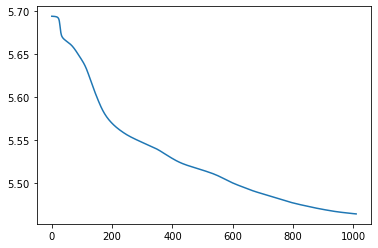

In [16]:
plt.plot(list(range(0,epochs, 1)), losses)

In [17]:
preds = np.ones((len(idx2word), embedding_dims))
for idx, i in enumerate(idx2word.keys()):
  x = get_input_layer(np.array([i]))
  out = model.input_line(x)
  preds[idx] = out.detach()

In [18]:
print(preds)

[[ 6.25703812e-01  1.98915231e+00 -4.90856171e-03 -3.05247307e-03
   2.66152453e+00]
 [ 1.16151416e+00  2.98094988e+00 -2.87199020e-03  2.11358070e-03
  -9.92774963e-04]
 [ 1.15646398e+00  2.97552419e+00 -2.49338150e-03 -3.38315964e-04
  -2.90703773e-03]
 ...
 [ 1.91180646e+00  1.24144888e+00  3.14043307e+00 -4.40406799e-03
  -3.16619873e-04]
 [ 3.26998854e+00 -3.24487686e-04  4.16523314e+00  3.79078388e-01
   9.22970295e-01]
 [ 3.36743975e+00 -2.17604637e-03  4.27915812e+00  3.84031057e-01
   9.59120989e-01]]
